In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from neupy.algorithms import GRNN as grnn
from neupy.estimators import mse

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 外部验证

In [29]:
data_evaluation =pd.read_excel('../Data/Seasonal_GRNN.xlsx',index_col='Date')[-12:]

In [30]:
data_evaluation

,Incidence_rate,forecast,NN
Date,,,
2014-01-01,6.576894,6.673836,6.613802
2014-02-01,5.693240,5.735268,5.643921
2014-03-01,6.233394,6.345317,6.191876
2014-04-01,6.017185,6.262331,6.078398
2014-05-01,5.868642,6.062793,5.902043
2014-06-01,5.635166,5.606478,5.642441
2014-07-01,5.505367,5.531027,5.368436
2014-08-01,5.249826,5.468642,5.375823
2014-09-01,4.950454,5.122056,5.152783


In [31]:
## 绝对误差
data_evaluation['Dist_ARIMA'] =abs(data_evaluation['forecast']-data_evaluation['Incidence_rate'])
data_evaluation['Dist_NN'] = abs(data_evaluation['NN']-data_evaluation['Incidence_rate'])
data_evaluation['Better'] = data_evaluation['Dist_ARIMA']  - data_evaluation['Dist_NN'] 

## 相对误差
data_evaluation['ARIMA_per']  = (data_evaluation['Dist_ARIMA']/data_evaluation['Incidence_rate'])*100
data_evaluation['NN_per'] = (data_evaluation['Dist_NN']/data_evaluation['Incidence_rate'])*100

print(np.mean(data_evaluation['ARIMA_per']))
print(np.mean(data_evaluation['NN_per']))

2.43136743292
1.22452702786


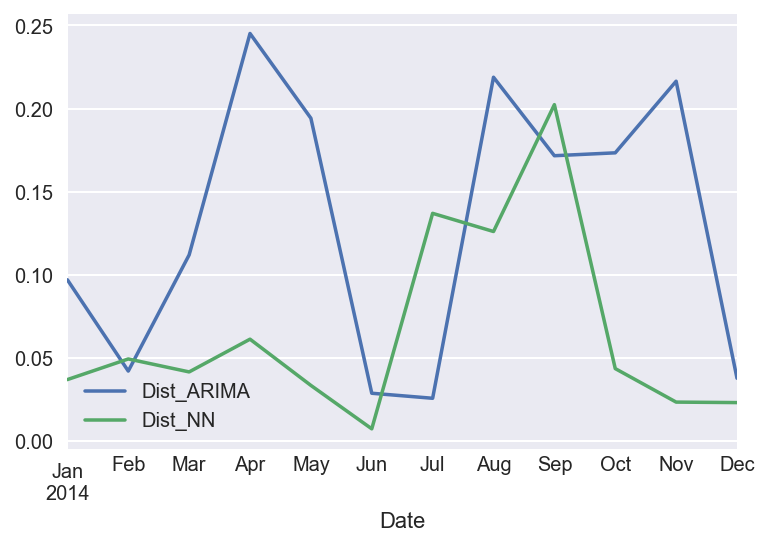

In [32]:
data_evaluation[['Dist_ARIMA','Dist_NN']].plot()

In [33]:
np.mean(data_evaluation['Dist_ARIMA'])

0.13020384563589063

In [34]:
np.mean(data_evaluation['Dist_NN'])

0.065402680432528879

In [35]:
sum(data_evaluation['Better']>0)

9

In [36]:
sum(data_evaluation['Better'])

0.77761398244034119

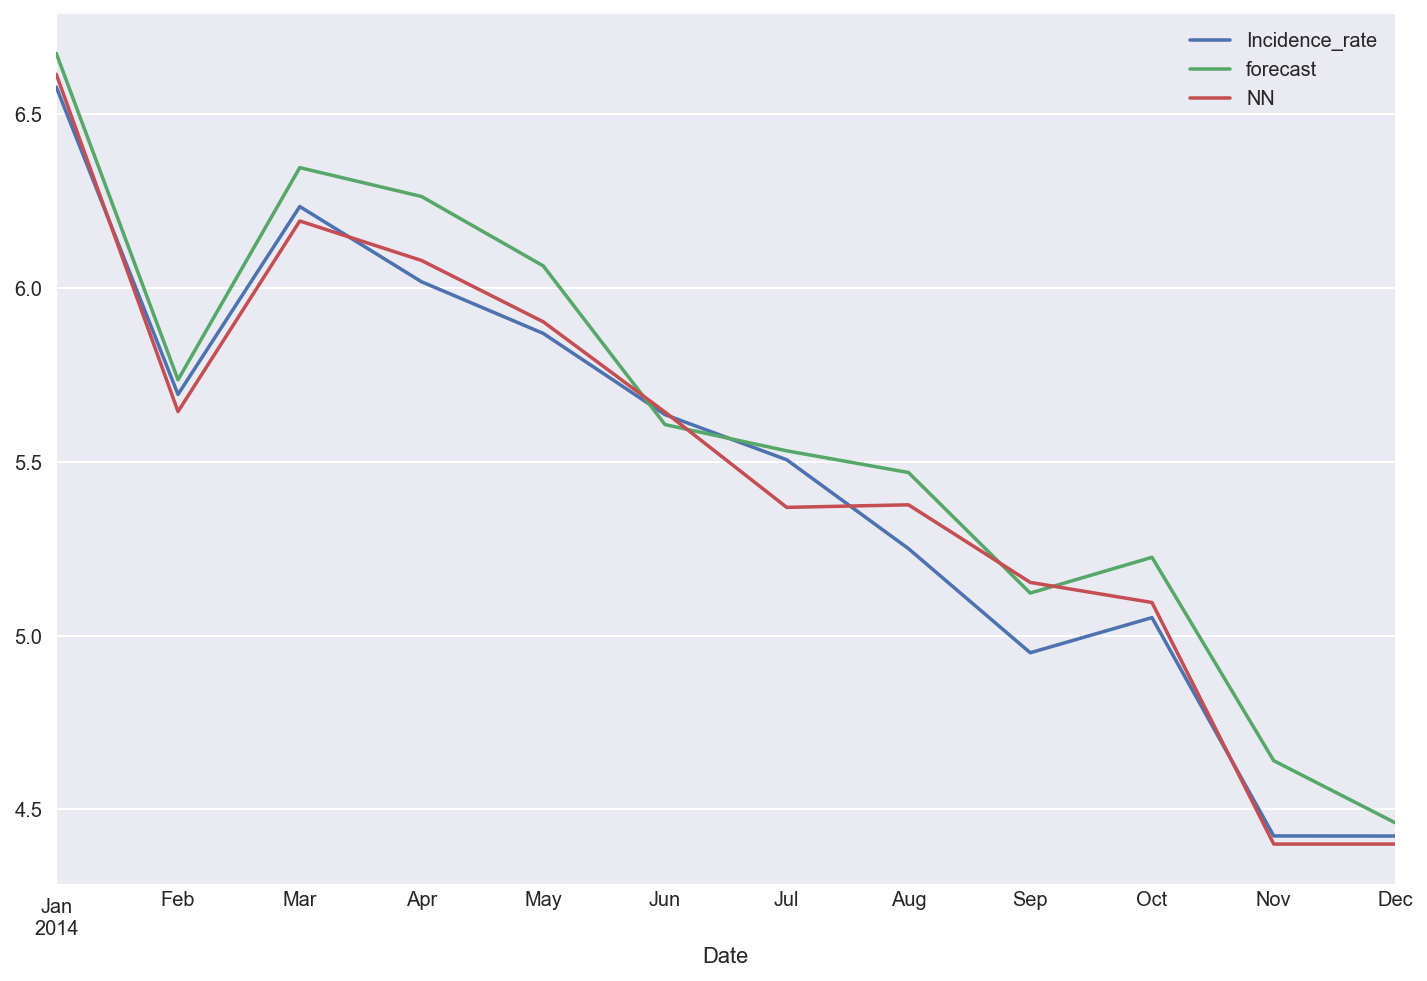

In [37]:
data_evaluation[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 内部验证

In [38]:
data_intro =pd.read_excel('../Data/Seasonal_GRNN.xlsx',index_col='Date')[:-12]

In [39]:
## 绝对误差
data_intro['Dist_ARIMA'] =abs(data_intro['forecast']-data_intro['Incidence_rate'])
data_intro['Dist_GRNN'] = abs(data_intro['NN']-data_intro['Incidence_rate'])
data_intro['Better'] = data_intro['Dist_ARIMA']  - data_intro['Dist_GRNN'] 

## 相对误差
data_intro['ARIMA_per']  = (data_intro['Dist_ARIMA']/data_intro['Incidence_rate'])*100
data_intro['GRNN_per'] = (data_intro['Dist_GRNN']/data_intro['Incidence_rate'])*100

In [40]:
np.mean(data_intro['Dist_ARIMA'])

0.33976735073633829

In [41]:
np.mean(data_intro['Dist_GRNN'])

0.19528510311544869

In [42]:
np.mean(data_intro['Better']>0)

0.66666666666666663

In [43]:
sum(data_intro['Better'])

13.870295771605399

In [44]:
np.mean(data_intro['Better'])/data_intro['Incidence_rate'].mean()*100

2.2115582565439715

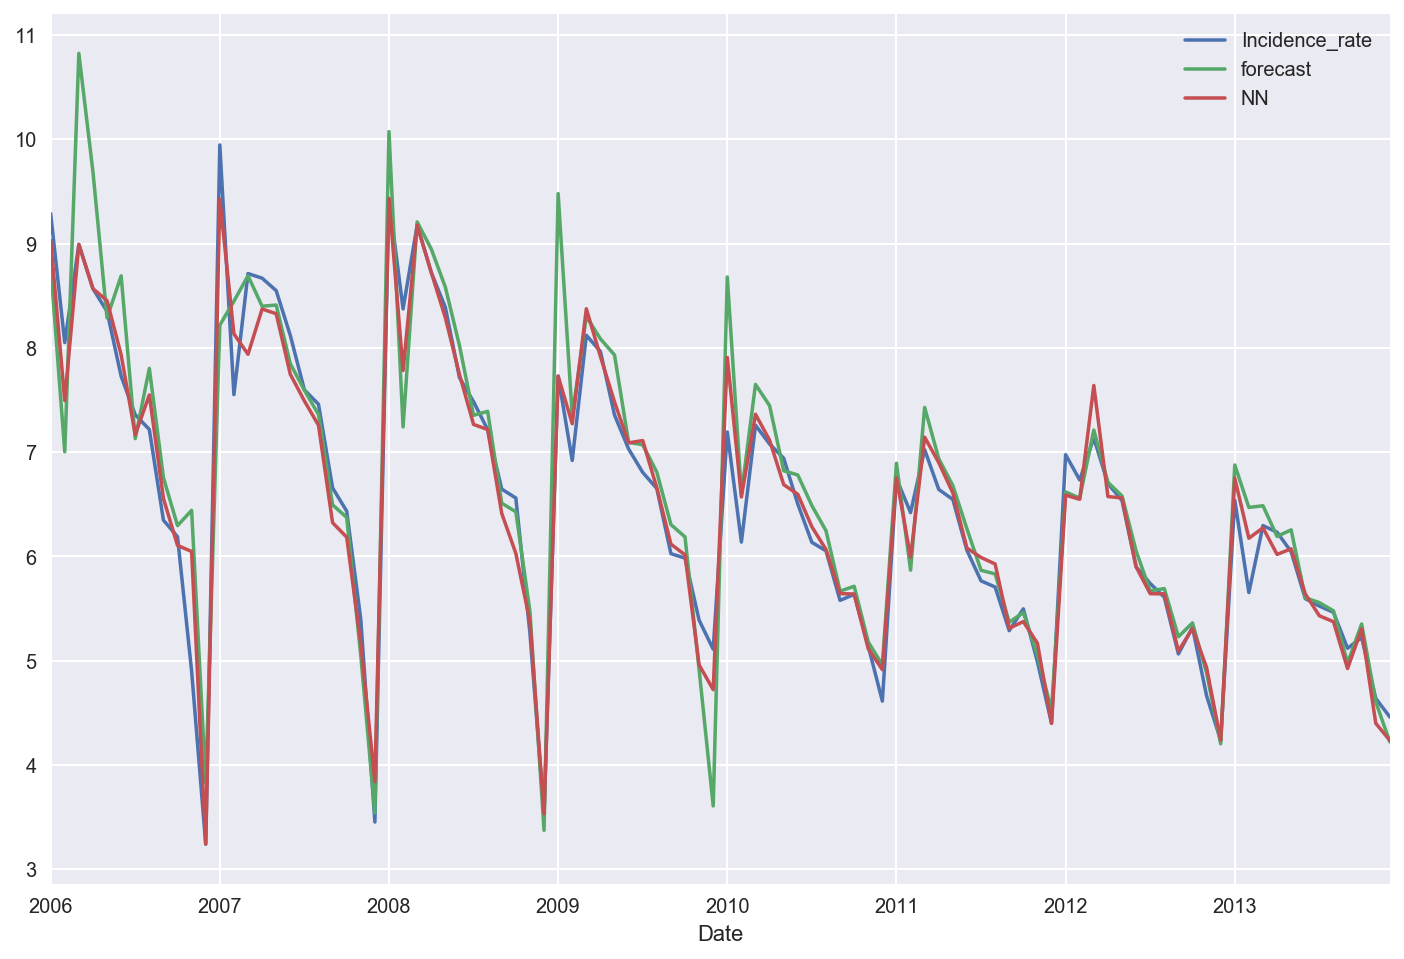

In [45]:
data_intro[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 数据集验证

In [46]:
data_total =pd.read_excel('../Data/Seasonal_GRNN.xlsx',index_col='Date')

In [47]:
## 绝对误差
data_total['Dist_ARIMA'] = abs(data_total['forecast']-data_total['Incidence_rate'])
data_total['Dist_GRNN'] = abs(data_total['NN']-data_total['Incidence_rate'])
data_total['Better'] = data_total['Dist_ARIMA']  - data_total['Dist_GRNN'] 
data_total['error_ARIMA'] = data_total['forecast']-data_total['Incidence_rate']
data_total['error_GRNN'] = data_total['NN']-data_total['Incidence_rate']

## 相对误差
data_total['ARIMA_per']  = (data_total['Dist_ARIMA']/data_total['Incidence_rate'])*100
data_total['GRNN_per'] = (data_total['Dist_GRNN']/data_total['Incidence_rate'])*100

In [48]:
np.mean(data_total['Dist_ARIMA'])

0.31648251683628853

In [49]:
np.mean(data_total['Dist_GRNN'])

0.18085372281734652

In [50]:
np.mean(data_total['Better']>0)

0.67592592592592593

In [51]:
sum(data_total['Better'])

14.64790975404574

In [52]:
np.mean(data_total['Better'])/data_total['Incidence_rate'].mean()*100

2.1143002304139946

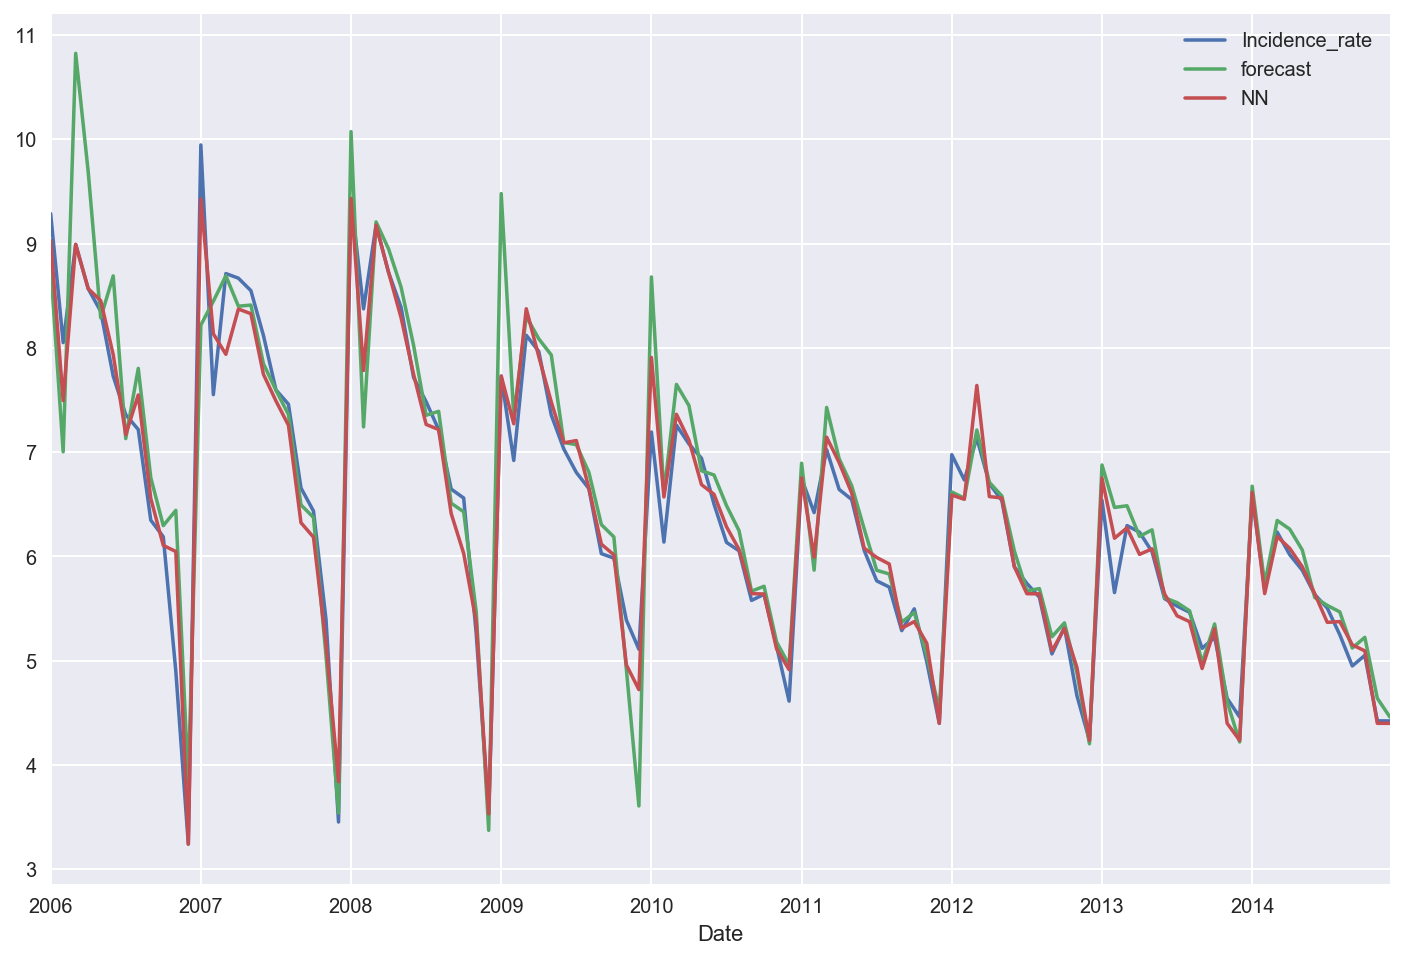

In [53]:
data_total[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 残差检验

In [27]:
data_total[['Dist_ARIMA','Dist_GRNN']]

,Dist_ARIMA,Dist_GRNN
Date,,
2006-01-01,0.502176,2.551046e-01
2006-02-01,1.046743,5.554219e-01
2006-03-01,1.831927,0.000000e+00
2006-04-01,1.121004,7.503505e-06
2006-05-01,0.061619,1.028596e-01
2006-06-01,0.961425,2.051188e-01
2006-07-01,0.228896,1.916469e-01
2006-08-01,0.585976,3.312513e-01
2006-09-01,0.407226,2.080783e-01


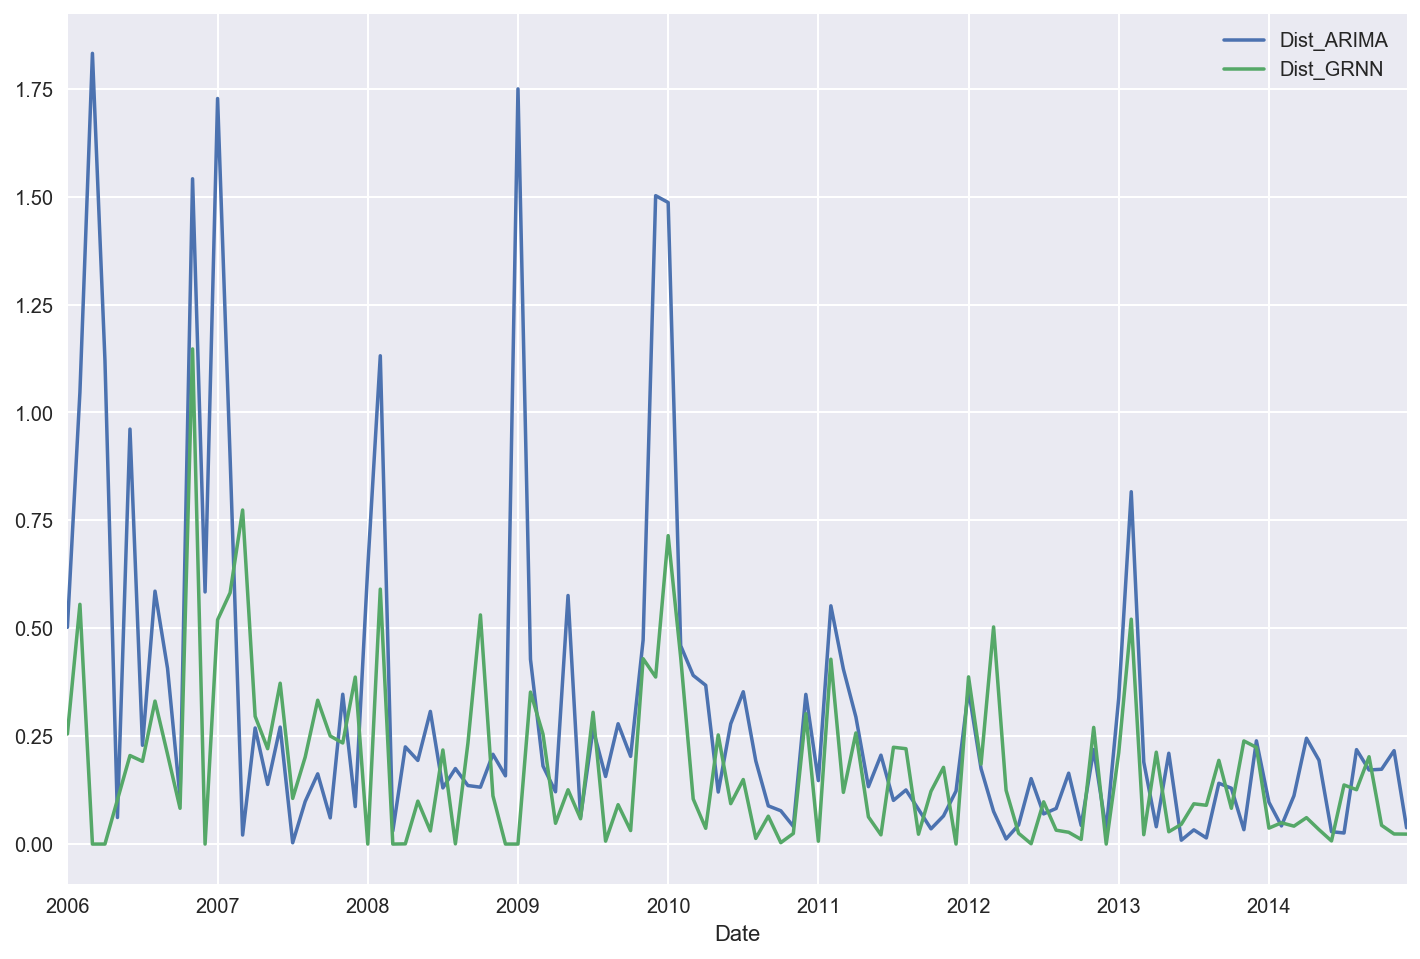

In [28]:
data_total[['Dist_ARIMA','Dist_GRNN']].plot(figsize=(12, 8)) 